# Mod 1 - Housing Data Project

### Importing data

In [241]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df.head()
#previewing data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Data Cleaning

#### Checking datatypes for variables

In [242]:
df.info()
#checking datatypes
#date and sqft_basement columns need reformatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


##### Converting date column to datetime object

In [243]:
df.date = pd.to_datetime(df['date'], format = '%m/%d/%Y')

##### Converting sqft_basement to integer

In [244]:
pd.DataFrame(df.sqft_basement.value_counts()).head()
#checking for unusual values

,sqft_basement
0.0,12826
?,454
600.0,217
500.0,209
700.0,208


In [245]:
((len(df.loc[df.sqft_basement == '?']) / df.shape[0])) * 100 
#checking proportion of sqft_basement equal to ?
#small but not negligible so needs to be replaced

2.1021438162707784

In [246]:
unknown_base = df.loc[df.sqft_basement == '?', ['sqft_living']].mean()[0]
zero_base = df.loc[df.sqft_basement == '0.0', ['sqft_living']].mean()[0]
non_zero_base = df.loc[(df.sqft_basement != '0.0') & (df.sqft_basement != '?') , ['sqft_living']].mean()[0]
print('?: {}, zero: {}, non-zero: {}'.format(unknown_base, zero_base, non_zero_base))
#sqft_basement should be strongly correlated with sqft_living
#check if zero is a suitable replacement
#mean sqft_living values are similar for ? and zero sqft basement values so suitable replacement

?: 2052.431718061674, zero: 1929.953609854982, non-zero: 2313.7335577732356


In [247]:
df.loc[df.sqft_basement == '?', ['sqft_basement']] = '0.0'
#replacing ? values with zero

In [248]:
df.sqft_basement = df.sqft_basement.astype('float64').astype('int64')
#converting sqft_basement column to integer format

#### Checking for missing values

In [249]:
missing_values = pd.DataFrame(df.isna().sum())
missing_values.loc[missing_values[0] > 0].sort_values(by = 0, ascending = False)
#large number of missing values for yr_renovated and waterfront columns
#small number of missing values for view column

,0
yr_renovated,3842
waterfront,2376
view,63


##### Dealing with missing waterfront values

In [250]:
water_corr = pd.DataFrame(df.drop(labels = ['price'], axis = 1).corr().waterfront)
water_corr.sort_values(by = 'waterfront', ascending = False).head()
#checking for correlations with other predictors
#waterfront is most strongly correlated with view 

,waterfront
waterfront,1.000000
view,0.406654
sqft_living,0.110230
sqft_living15,0.088860
sqft_basement,0.088213


In [251]:
null_water = df.loc[df.waterfront.isnull(), ['view']].mean()[0]
zero_water = df.loc[df.waterfront == 0, ['view']].mean()[0]
non_zero_water = df.loc[df.waterfront > 0, ['view']].mean()[0]
print('null: {}, zero: {}, non-zero: {}'.format(null_water, zero_water, non_zero_water))
#mean view values similar for null and zero waterfront values so suitable replacement

null: 0.25654008438818565, zero: 0.20395394079604606, non-zero: 3.786206896551724


In [252]:
df.waterfront.fillna(0, inplace = True)
#replacing missing waterfront values with zero

In [253]:
df.waterfront.isna().sum()
#checking if missing waterfront values replaced

0

##### Dealing with missing year renovated values

In [254]:
renovated_corr = pd.DataFrame(df.drop(labels = ['price'], axis = 1).corr().yr_renovated)
renovated_corr.sort_values(by = 'yr_renovated', ascending = False).head()
#checking for correlations with other predictors
#no strong correlations

,yr_renovated
yr_renovated,1.000000
view,0.100964
waterfront,0.081397
sqft_basement,0.071190
zipcode,0.069846


In [255]:
pd.DataFrame(df.yr_renovated.value_counts(normalize=True)).head()
#checking for common yr_renovated values
#a large proportion of values are zero so replace

,yr_renovated
0.0,0.958096
2014.0,0.004112
2003.0,0.001746
2013.0,0.001746
2007.0,0.001690


In [256]:
df.yr_renovated.fillna(0, inplace = True)
#replacing missing yr_renovated values with zero

In [257]:
df.yr_renovated.isna().sum()
#checking if missing yr_renovated values replaced

0

##### Dealing with missing view values

In [258]:
len(df.loc[df.view.isnull()])/df.shape[0] * 100 
#checking proportion of missing view values
#negligible proportion so reasonable to remove

0.29170718155299347

In [259]:
df.drop(labels = df.loc[df.view.isnull()].index, axis = 0, inplace = True)
#removing missing view values

In [260]:
df.view.isna().sum() 
#checking if missing view values removed

0

#### Checking for outliers

In [261]:
df.describe() 
#inspecting aggregregte statistics for each column
#appears to be unusually high values for bedroom, bathroom, sqft_lot and sqft_lot15 columns

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.006734,0.233863,3.409724,7.657425,1788.557537,285.244311,1971.002275,68.866722,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.081783,0.765686,0.650654,1.172643,827.745641,439.334095,29.376044,364.314552,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##### Dealing with bedroom outliers

In [262]:
pd.DataFrame(df[['bedrooms']]).sort_values(by = 'bedrooms', ascending= False).head()
#top value considerably larger than rest

,bedrooms
15856,33
8748,11
19239,10
15147,10
13301,10


In [263]:
df.drop(labels = df.loc[df.bedrooms == df.bedrooms.max()].index, axis = 0, inplace=True)
#removing top bedroom value

##### Dealing with bathroom outliers

In [264]:
pd.DataFrame(df[['bathrooms']]).sort_values(by = 'bathrooms', ascending= False).head()
#bathroom outlier already removed with bedroom outlier

,bathrooms
12764,8.00
7245,8.00
9245,7.75
8537,7.50
8085,6.75


##### Dealing with sqft_lot outliers

In [265]:
pd.DataFrame(df[['sqft_lot']]).sort_values(by = 'sqft_lot', ascending= False).head()
#top value considerably larger than rest

,sqft_lot
1717,1651359
17305,1164794
7640,1074218
7762,1024068
3945,982998


In [266]:
df.drop(labels = df.loc[df.sqft_lot == df.sqft_lot.max()].index, axis = 0, inplace=True)
#removing top sqft_lot value

##### Dealing with sqft_lot15 outliers

In [267]:
pd.DataFrame(df[['sqft_lot15']]).sort_values(by = 'sqft_lot15', ascending= False).head()
#top three values are considerably larger than rest

,sqft_lot15
9705,871200
20436,858132
13451,560617
8655,438213
3797,434728


In [268]:
df.drop(labels = df.loc[df.sqft_lot15 == df.sqft_lot15.max()].index, axis = 0, inplace=True)
df.drop(labels = df.loc[df.sqft_lot15 == df.sqft_lot15.max()].index, axis = 0, inplace=True)
df.drop(labels = df.loc[df.sqft_lot15 == df.sqft_lot15.max()].index, axis = 0, inplace=True)
#removing top three sqft_lot values

### Exploratory Data Analysis

#### How are the prices distributed by zipcode?

In [269]:
mean_zipcodes = df.groupby(by = 'zipcode')[['lat','long', 'price']].mean()
mean_zipcodes.head()
#calculating the mean latitude, longitude and price for each zipcode

,lat,long,price
zipcode,,,
98001,47.309119,-122.270713,2.808812e+05
98002,47.308780,-122.213357,2.342840e+05
98003,47.315741,-122.310054,2.941113e+05
98004,47.616227,-122.205190,1.358522e+06
98005,47.611532,-122.167268,8.102897e+05


In [270]:
mean_prices_aggregates = pd.DataFrame(mean_zipcodes.price.describe()).reset_index()
mean_prices_lower = float(mean_prices_aggregates.loc[mean_prices_aggregates['index'] == '25%', ['price']]['price'])
mean_prices_upper = float(mean_prices_aggregates.loc[mean_prices_aggregates['index'] == '75%', ['price']]['price'])
#calculating upper and lower quartiles for mean prices
mean_zipcodes['price_band'] = mean_zipcodes.price.apply(lambda x: 'cheap' if x < mean_prices_lower else ('expensive' if x > mean_prices_upper else 'average'))
mean_zipcodes.head()
#grouping zipcodes into mean price bands

,lat,long,price,price_band
zipcode,,,,
98001,47.309119,-122.270713,2.808812e+05,cheap
98002,47.308780,-122.213357,2.342840e+05,cheap
98003,47.315741,-122.310054,2.941113e+05,cheap
98004,47.616227,-122.205190,1.358522e+06,expensive
98005,47.611532,-122.167268,8.102897e+05,expensive


In [271]:
import folium

map_centre = [float(mean_zipcodes.lat.mean()), float(mean_zipcodes.long.mean())]
map_background = folium.Map(location = map_centre, zoom_start = 9)
folium.TileLayer('cartodbpositron').add_to(map_background)
folium.CircleMarker(location = map_centre , radius = 10, color = 'black').add_to(map_background) 

for zipcode, row in mean_zipcodes.iterrows():
    if row['price_band'] == 'cheap':
        folium.CircleMarker(location = [row['lat'], row['long']] , radius = 2, color = 'green').add_to(map_background) 
    if row['price_band'] == 'average':
        folium.CircleMarker(location = [row['lat'], row['long']] , radius = 2, color = 'yellow').add_to(map_background)
    if row['price_band'] == 'expensive':
        folium.CircleMarker(location = [row['lat'], row['long']] , radius = 2, color = 'red').add_to(map_background)
map_background

#plotting zipcodes on a map, colour coded by price band
#appears that zipcodes in similar price bands are typically close to each other geographically

#### How is each predictor correlated with price?

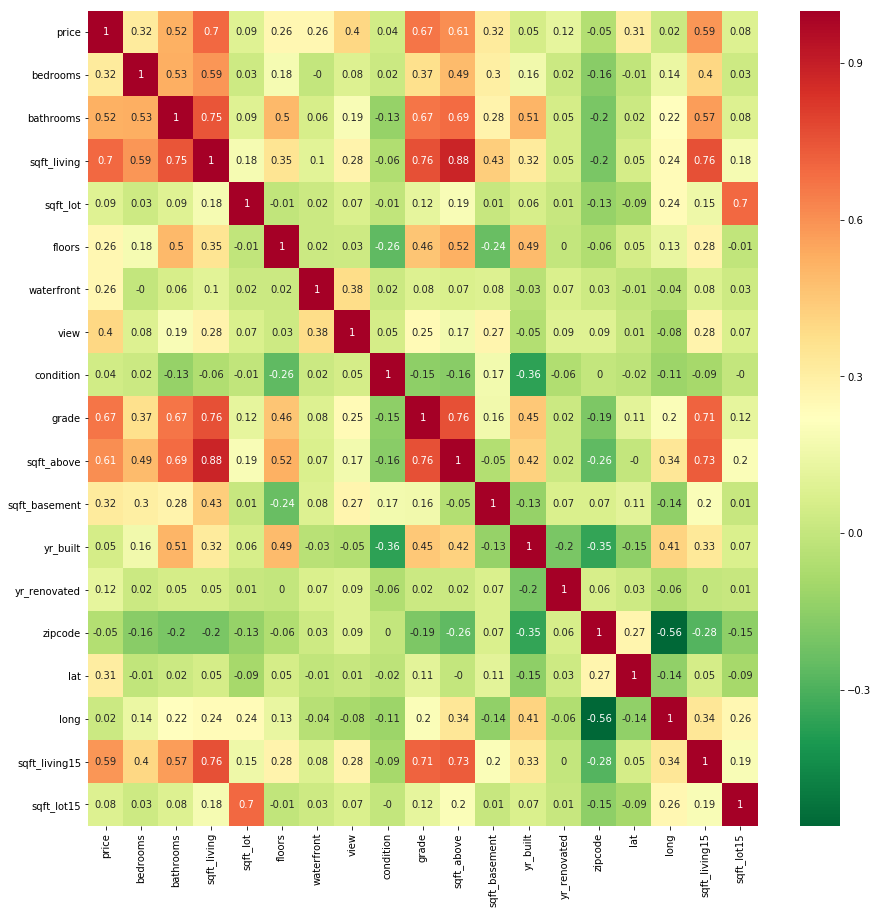

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
sns.heatmap(df.drop(labels = ['id'], axis = 1).corr().round(2), cmap='RdYlGn_r', annot=True)

In [273]:
#import pandas_profiling as pp 

In [274]:
#df.profile_report(style={'full_width':True})